In [3]:
pip install yfinance

     |████████████████████████████████| 6.4 MB 7.4 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [22]:
import yfinance as yf, numpy as np, datetime as dt, matplotlib.pyplot as plt
from scipy.stats import norm

In [5]:
# Companies
tickers = ['AAPL','FB','C','DIS','F','MSFT','MS','GME','TLSA','AMZN']
# Equally weighted portfolios 
weights = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [6]:
# Build a portfolio and calculate the daily returns 
start = dt.datetime(2019,1,1)
end = dt.datetime.now()

df = yf.download(tickers, start, end)['Adj Close']
df

[*********************100%***********************]  10 of 10 completed


,AAPL,AMZN,C,DIS,F,FB,GME,MS,MSFT,TLSA
Date,,,,,,,,,,
2019-01-02,38.277527,1539.130005,48.169380,107.654343,7.210713,135.679993,12.641105,36.967560,97.782417,1.420568
2019-01-03,34.464794,1500.280029,47.296520,105.046211,7.101183,131.740005,12.544387,36.308727,94.185188,1.420568
2019-01-04,35.936073,1575.390015,49.609146,108.286606,7.375008,137.949997,14.739896,37.791084,98.565704,1.400560
2019-01-07,35.856091,1629.510010,50.041080,109.225136,7.566685,138.050003,14.972020,38.166256,98.691406,1.350540
2019-01-08,36.539616,1656.579956,49.906094,110.074753,7.639705,142.529999,15.291192,37.928345,99.406990,1.400560
...,...,...,...,...,...,...,...,...,...,...
2022-02-04,172.389999,3152.790039,66.080002,142.020004,17.959999,237.089996,102.339996,104.110001,305.940002,0.770000
2022-02-07,171.660004,3158.709961,66.360001,142.509995,17.889999,224.910004,102.339996,105.180000,300.950012,0.760000
2022-02-08,174.830002,3228.270020,67.120003,142.479996,17.719999,220.179993,115.599998,106.349998,304.559998,0.780000


In [7]:
returns = df.pct_change()
returns

,AAPL,AMZN,C,DIS,F,FB,GME,MS,MSFT,TLSA
Date,,,,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.099608,-0.025242,-0.018121,-0.024227,-0.015190,-0.029039,-0.007651,-0.017822,-0.036788,0.000000
2019-01-04,0.042689,0.050064,0.048896,0.030847,0.038560,0.047138,0.175019,0.040826,0.046510,-0.014084
2019-01-07,-0.002226,0.034353,0.008707,0.008667,0.025990,0.000725,0.015748,0.009928,0.001275,-0.035714
2019-01-08,0.019063,0.016612,-0.002698,0.007779,0.009650,0.032452,0.021318,-0.006234,0.007251,0.037037
...,...,...,...,...,...,...,...,...,...,...
2022-02-04,-0.001679,0.135359,0.020541,0.014211,-0.097034,-0.002818,0.031341,0.017793,0.015568,-0.037500
2022-02-07,-0.004235,0.001878,0.004237,0.003450,-0.003898,-0.051373,0.000000,0.010278,-0.016310,-0.012987
2022-02-08,0.018467,0.022022,0.011453,-0.000211,-0.009503,-0.021031,0.129568,0.011124,0.011995,0.026316


In [8]:
# Calculate the Variance-Covariance Matrix
cov_matrix = returns.cov()
cov_matrix

,AAPL,AMZN,C,DIS,F,FB,GME,MS,MSFT,TLSA
AAPL,0.000459,0.000263,0.000267,0.000191,0.000202,0.000317,0.000268,0.000273,0.000316,0.000070
AMZN,0.000263,0.000377,0.000141,0.000134,0.000085,0.000288,0.000135,0.000146,0.000253,0.000044
C,0.000267,0.000141,0.000748,0.000373,0.000461,0.000240,0.000465,0.000559,0.000250,-0.000119
DIS,0.000191,0.000134,0.000373,0.000466,0.000288,0.000199,0.000165,0.000324,0.000194,-0.000099
F,0.000202,0.000085,0.000461,0.000288,0.000782,0.000180,0.000451,0.000407,0.000168,0.000069
FB,0.000317,0.000288,0.000240,0.000199,0.000180,0.000590,0.000148,0.000231,0.000298,0.000135
GME,0.000268,0.000135,0.000465,0.000165,0.000451,0.000148,0.011892,0.000257,0.000167,-0.000259
MS,0.000273,0.000146,0.000559,0.000324,0.000407,0.000231,0.000257,0.000592,0.000256,-0.000056
MSFT,0.000316,0.000253,0.000250,0.000194,0.000168,0.000298,0.000167,0.000256,0.000367,-0.000017
TLSA,0.000070,0.000044,-0.000119,-0.000099,0.000069,0.000135,-0.000259,-0.000056,-0.000017,0.006885


In [9]:
# Calculate Portfolio Expected Return (mean)
avg_returns = returns.mean()
avg_returns

AAPL    0.002149
AMZN    0.001113
C       0.000807
DIS     0.000672
F       0.001559
FB      0.000967
GME     0.007880
MS      0.001657
MSFT    0.001625
TLSA    0.002343
dtype: float64

In [10]:
# Calculate Portfolio Risk (std)
std_returns = returns.std()
std_returns

AAPL    0.021429
AMZN    0.019416
C       0.027349
DIS     0.021582
F       0.027957
FB      0.024284
GME     0.109048
MS      0.024336
MSFT    0.019163
TLSA    0.082975
dtype: float64

In [11]:
# Number of dates available for company data
count = returns.count()[0]
count

784

In [12]:
# Building the normal distribution curve using the results in SciPy library
# @ represents matrix multiplication in Python 
port_mean = avg_returns @ weights 
port_std = np.sqrt(weights.T @ cov_matrix @ weights)

In [13]:
port_mean

0.0020771561857726713

In [14]:
port_std

0.020349982342641217

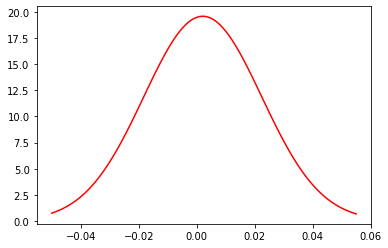

In [24]:
x = np.arange(-0.05, 0.055, 0.001)
norm_dist = norm.pdf(x, port_mean, port_std)
norm_dist
# Plotting the distribution
plt.plot(x, norm_dist, color='r')
plt.show()

In [26]:
# Calculate VaR, the probability of loss with 5% cofidence of interval 
# We have confidence that we won't lose more than x% in a day
confidence_level = 0.05
VaR = norm.ppf(confidence_level, port_mean, port_std)
VaR

-0.031395586078919166

In [27]:
# In 5 days, my portfolio will not lose more than x% 
num_days = 5
VaR * np.sqrt(num_days)

-0.07020266466590934

In [31]:
# Confindence level - we are confident that the daily return of the portfolio will be between the lower - higher range
lower = port_mean - 2* port_std / np.sqrt(count)
higher = port_mean + 2* port_std / np.sqrt(count)

In [32]:
lower

0.0006235860184411557

In [33]:
higher

0.003530726353104187